In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from steinberg_utils_3vertex import *
from general_graph_utils_main import *

In [2]:
# plot formatting
plt.rc("text", usetex=False) # renders LaTeX more quickly
plt.rc("font", family = "serif",size=14) # font specifications
plt.rc("figure",figsize=(14,12)) # figure size
%config InlineBackend.figure_format = 'retina' # retina-display quality

In [3]:
signal = [3, 5, 7]
alpha = 1
beta = 3
tau = np.around(np.arange(0.01,4,step=.01), decimals = 2)

params = random_parameters()
L = Laplacian_K(params)
pi = steady_state_MTT_K(params)
a_13, a_31 = asymmetric_autocorrelation(signal,L,tau,pi,alpha,beta)

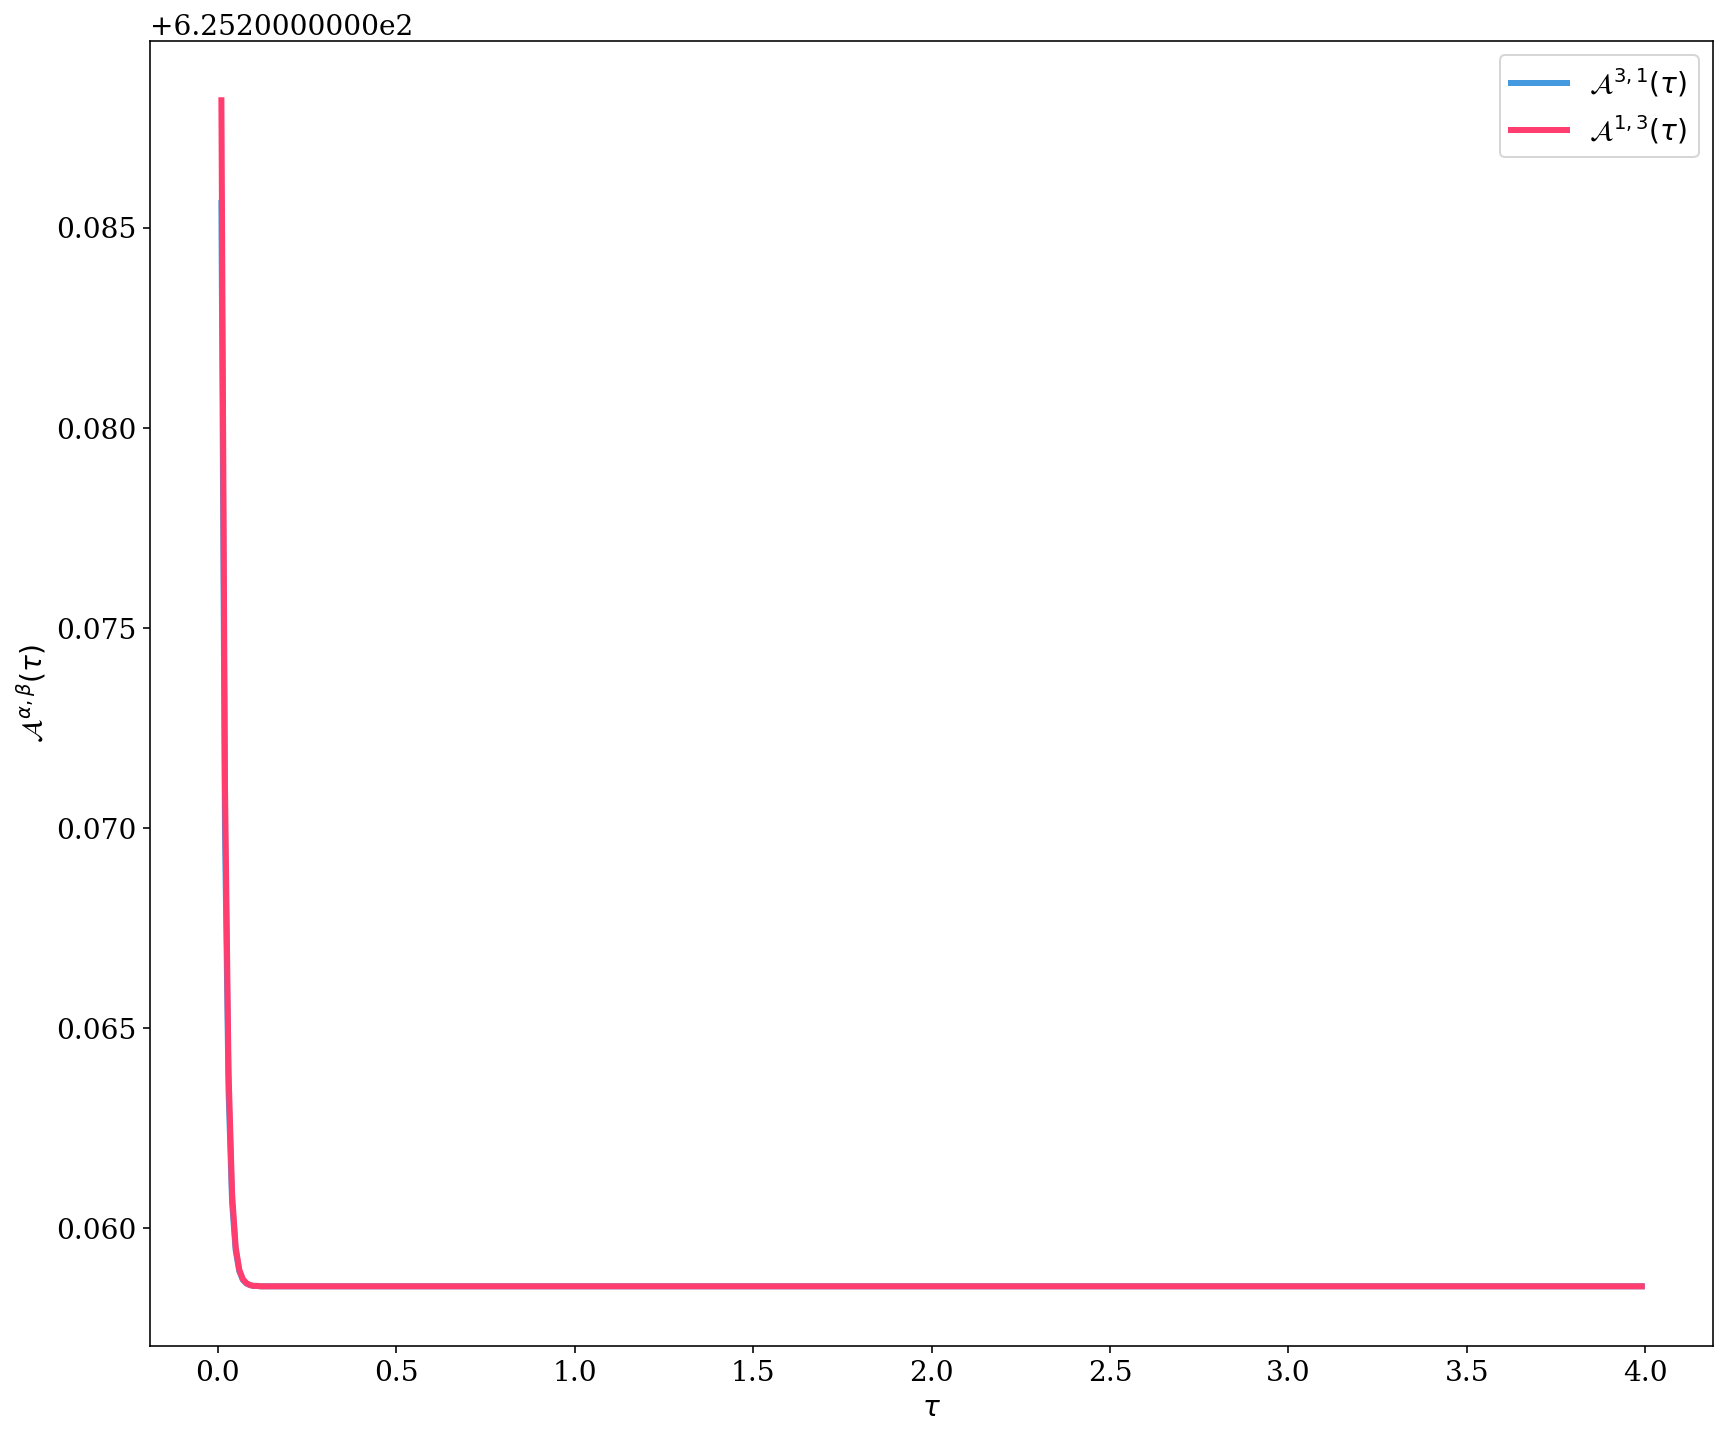

In [4]:
fig = plt.figure()
plt.plot(tau,a_13,label=r'$\mathcal{A}^{3,1}(\tau)$',linewidth=3, c= '#4599DF')
plt.plot(tau,a_31,label=r'$\mathcal{A}^{1,3}(\tau)$',linewidth=3,color='#FF3D6E')
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\mathcal{A}^{\alpha,\beta}(\tau)$")
plt.legend()
plt.show()

In [5]:
print(len(a_13))

399


In [6]:
def which_above(a_13,a_31):
    """
    Identifies which autocorrelation function -- forward or reverse -- lies on top of the other.
    """
    assign = 0
    num_indices = len(a_13)
    
    while assign != 1:

        j = np.random.randint(num_indices,size=1)[0]
        
        if a_13[j] > a_31[j]:
            top = a_13
            bottom = a_31
            assign = 1
            #print("top = a_13")

        elif a_31[j] > a_13[j]:
            top = a_31
            bottom = a_13
            assign = 1
            #print("top = a_31")

        else:
            assign = 0
            continue
    return top, bottom

In [7]:
def test_separation(top,bottom):
    """
    Identifies which, if any, elements of the bottom array surpass the top array
    """
    
    overlap_index = np.array([])
    num_indices = len(top)
    
    i = 0
    
    for i in range(num_indices):    
        if bottom[i] > top[i]:
            overlap_index = np.append(overlap_index,i)
            i += 1
        else:
            continue
    
    return overlap_index

In [8]:
top, bottom = which_above(a_13,a_31)

In [9]:
overlap_index = test_separation(top,bottom)

In [10]:
overlap_index

array([], dtype=float64)

In [11]:
def check_monotonic_dec(array):
    return (
		# Check for decreasing order sequence...
		all(element <= array[index - 1] for index, element in enumerate(array) if index > 0)
	)

In [12]:
def check_monotonic_inc(array):
    return (
		# Check for increasing order sequence...
		all(element >= array[index - 1] for index, element in enumerate(array) if index > 0)
    )

In [13]:
print("Is Monotonic Decreasing?: ", check_monotonic_dec([7, 5, 3, 1]))
print("Is Monotonic Increasing?: ", check_monotonic_inc([7, 5, 3, 1]))
print("Is Monotonic Decreasing?: ", check_monotonic_dec([1, 3, 5, 7]))
print("Is Monotonic Increasing?: ", check_monotonic_inc([1, 3, 5, 7]))
print("Is Monotonic Decreasing?: ", check_monotonic_dec([4, 0, 3, 1]))
print("Is Monotonic Increasing?: ", check_monotonic_inc([4, 0, 3, 1]))

Is Monotonic Decreasing?:  True
Is Monotonic Increasing?:  False
Is Monotonic Decreasing?:  False
Is Monotonic Increasing?:  True
Is Monotonic Decreasing?:  False
Is Monotonic Increasing?:  False


In [14]:
check_monotonic_dec(a_13)

True

In [15]:
check_monotonic_dec(a_31)

True

# Tests for separation and monotonicity:

In [116]:
signal = [3, 5, 7]
alpha = 1
beta = 3
tau = np.around(np.arange(0.01,4,step=.01), decimals = 2)

separation = np.array([])
check_fxns = np.array([])

for i in tqdm(range(100)):
    params = random_parameters()
    L = Laplacian_K(params)
    pi = steady_state_MTT_K(params)
    a_13, a_31 = asymmetric_autocorrelation(signal,L,tau,pi,alpha,beta)
    top, bottom = which_above(a_13,a_31)
    overlap_index = test_separation(top,bottom)

print(len(separation))

  1%|▍                                          | 1/100 [00:02<04:43,  2.87s/it]


KeyboardInterrupt: 

In [ ]:
print(overlap_index)
    if len(overlap_index) == 0:
        separation = np.append(separation, 1)
    else:
        check_fxns = np.append(check_fxns, top)
        check_fxns = np.append(check_fxns, bottom)

In [113]:
len(separation)

20

In [115]:
len(check_fxns)/399

0.0

In [100]:
bottom_start = len(check_fxns)-399
top_start = len(check_fxns)-399-399

In [104]:
bottom = check_fxns[bottom_start:]
top = check_fxns[:bottom_start]

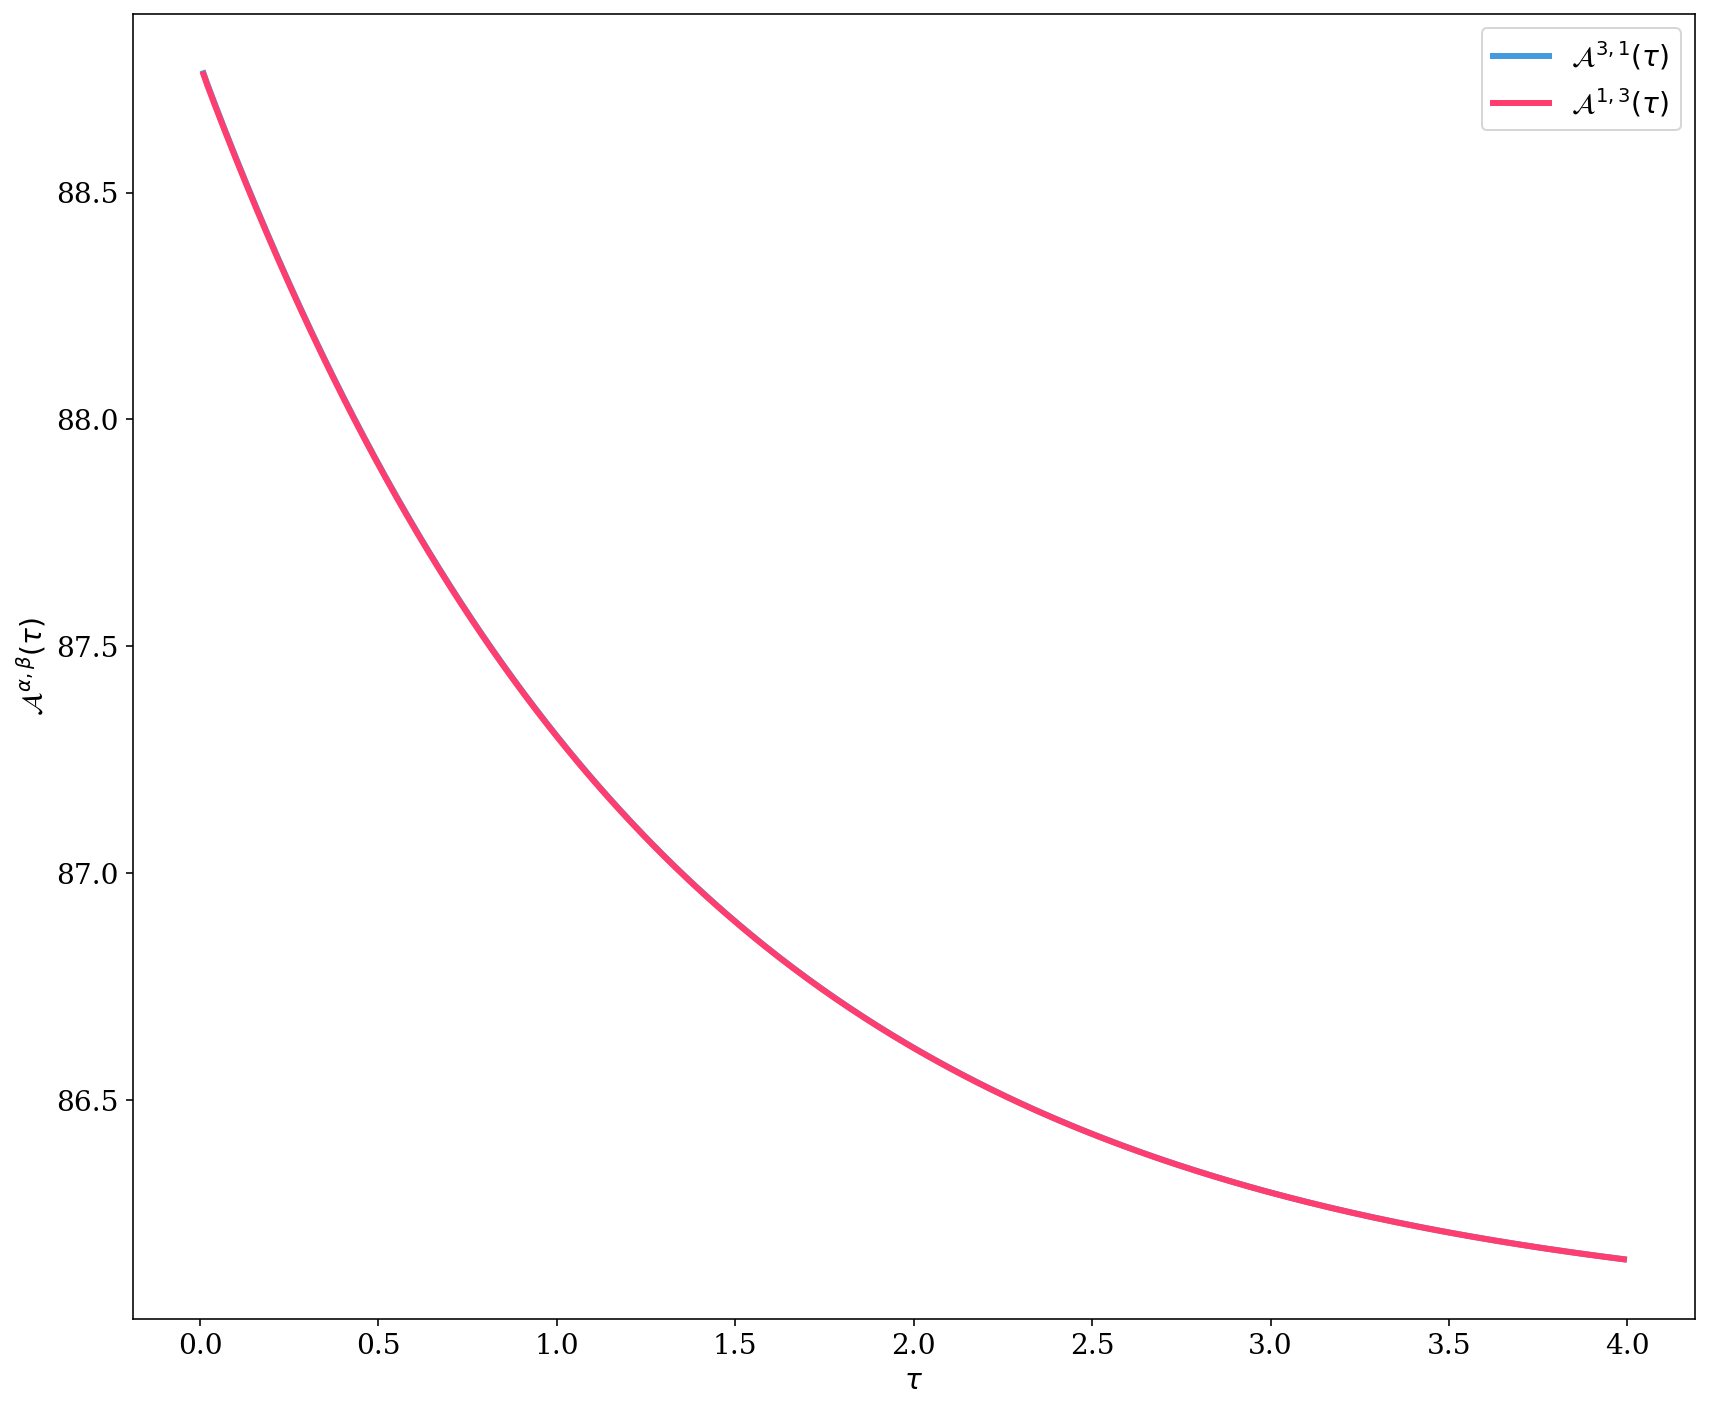

In [117]:
fig = plt.figure()
plt.plot(tau,top,label=r'$\mathcal{A}^{3,1}(\tau)$',linewidth=3, c= '#4599DF')
plt.plot(tau,bottom,label=r'$\mathcal{A}^{1,3}(\tau)$',linewidth=3,color='#FF3D6E')
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\mathcal{A}^{\alpha,\beta}(\tau)$")
plt.legend()
plt.show()

In [ ]:
print(overlap_index)
    if len(overlap_index) == 0:
        separation = np.append(separation, 1)
    else:
        check_fxns = np.append(check_fxns, top)
        check_fxns = np.append(check_fxns, bottom)

In [ ]:
monotonic = np.array([])

for i in tqdm(range(100)):
    params = random_parameters()
    L = Laplacian_K(params)
    pi = steady_state_MTT_K(params)
    a_13, a_31 = asymmetric_autocorrelation(signal,L,tau,pi,alpha,beta)
    top, bottom = which_above(a_13,a_31)
    overlap_index = test_separation(top,bottom)
    if overlap_index.size == 0:
        monotonic = np.append(separation, 1)

print(len(separation))